<a href="https://colab.research.google.com/github/vivekr25-dev/Python/blob/main/LifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import kagglehub
import os
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("fredericksalazar/life-expectancy-1960-to-present-global")
print("Path to dataset files:", path)
print("Files in the dataset folder:", os.listdir(path))

# Use the correct CSV file name
csv_file_path = os.path.join(path, "life_expectancy_dataset.csv")

# Use semicolon as the delimiter
df = pd.read_csv(csv_file_path, sep=';')  # Specify the delimiter
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/fredericksalazar/life-expectancy-1960-to-present-global/versions/1
Files in the dataset folder: ['life_expectancy_dataset.csv']


,country_code,country_name,region,sub-region,intermediate-region,year,life_expectancy_women,life_expectancy_men
0,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1960,"33,28","31,87"
1,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1961,"33,81","32,41"
2,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1962,"34,30","32,88"
3,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1963,"34,77","33,35"
4,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1964,"35,25","33,83"


In [6]:
df.dtypes

,0
country_code,object
country_name,object
region,object
sub-region,object
intermediate-region,object
year,int64
life_expectancy_women,float64
life_expectancy_men,float64


In [14]:
df.info()  # Provides data types, non-null counts, and memory usage
df.describe()  # Gives descriptive statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13545 entries, 0 to 13544
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_code           13545 non-null  object 
 1   country_name           13545 non-null  object 
 2   region                 13545 non-null  object 
 3   sub-region             13545 non-null  object 
 4   intermediate-region    5670 non-null   object 
 5   year                   13545 non-null  int64  
 6   life_expectancy_women  13545 non-null  float64
 7   life_expectancy_men    13545 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 846.7+ KB


,year,life_expectancy_women,life_expectancy_men
count,13545.000000,13545.000000,13545.000000
mean,1991.000000,64.517931,59.653992
std,18.184914,17.778717,16.444545
min,1960.000000,0.000000,0.000000
25%,1975.000000,57.830000,53.850000
50%,1991.000000,69.590000,63.950000
75%,2007.000000,76.050000,69.920000
max,2022.000000,88.060000,83.350000


In [15]:
df.isnull().sum()  # Shows the number of missing values in each column

,0
country_code,0
country_name,0
region,0
sub-region,0
intermediate-region,7875
year,0
life_expectancy_women,0
life_expectancy_men,0


In [16]:
df['country_name'].value_counts()  # Frequency of each country
df['region'].value_counts()  # Frequency of each region
# Similar for other categorical columns

,count
region,
AFRICA,3402
ASIA,3150
EUROPE,2898
AMERICAS,2898
OCEANIA,1197


In [18]:
df['sub-region'].value_counts()

,count
sub-region,
SUB-SAHARAN AFRICA,3024
LATIN AMERICA AND THE CARIBBEAN,2646
WESTERN ASIA,1134
SOUTHERN EUROPE,945
NORTHERN EUROPE,756
SOUTH-EASTERN ASIA,693
EASTERN EUROPE,630
SOUTHERN ASIA,567
WESTERN EUROPE,567


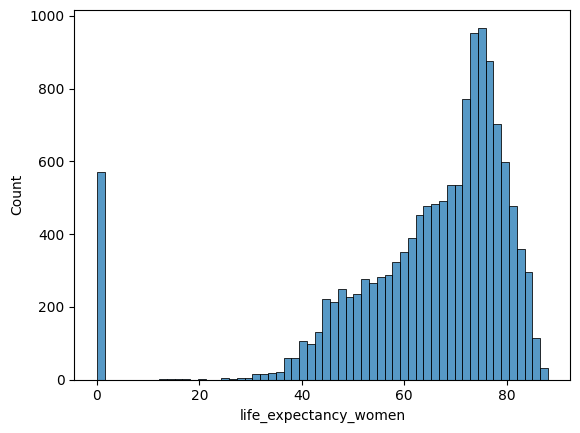

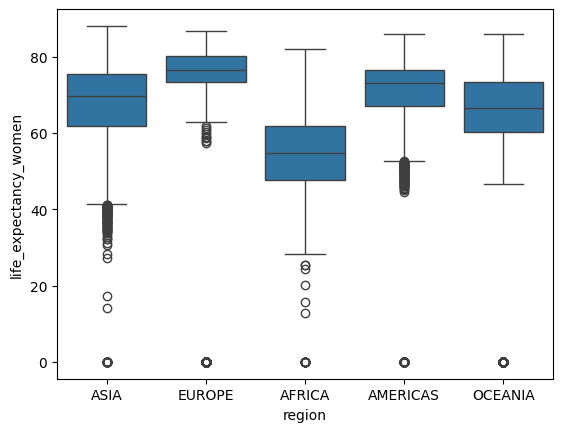

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['life_expectancy_women'])
plt.show()
sns.boxplot(x='region', y='life_expectancy_women', data=df)
plt.show()
# Similar for life_expectancy_men

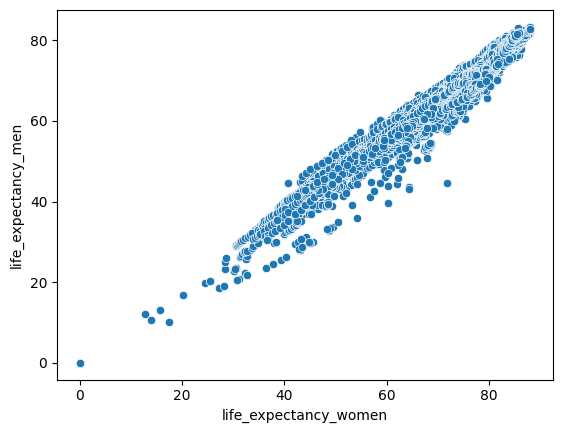

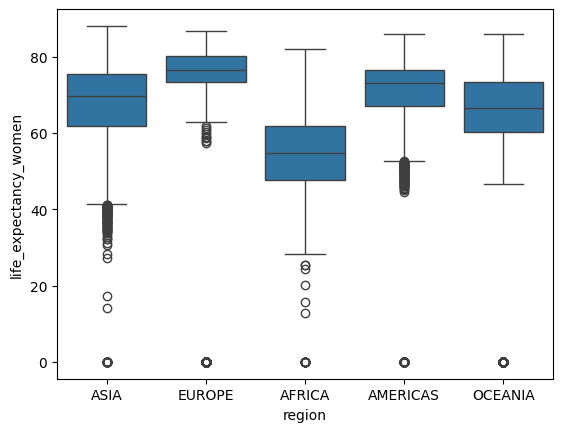

In [20]:
sns.scatterplot(x='life_expectancy_women', y='life_expectancy_men', data=df)
plt.show()
sns.boxplot(x='region', y='life_expectancy_women', data=df)
plt.show()
# Explore other combinations

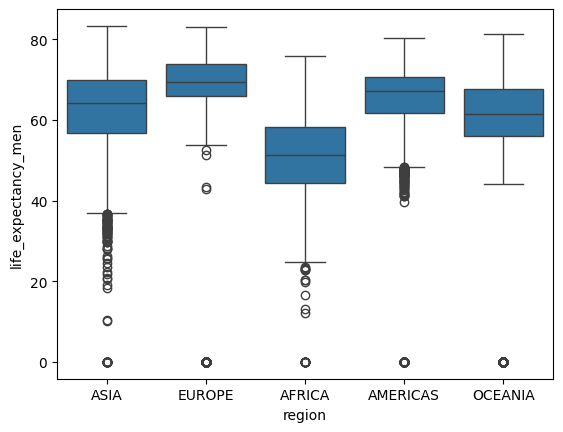

In [21]:
sns.boxplot(x='region', y='life_expectancy_men', data=df)
plt.show()

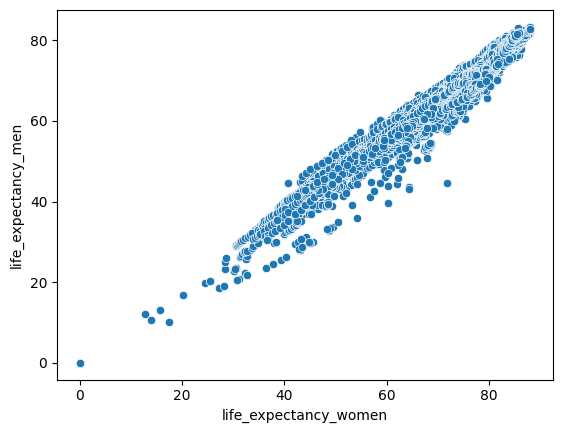

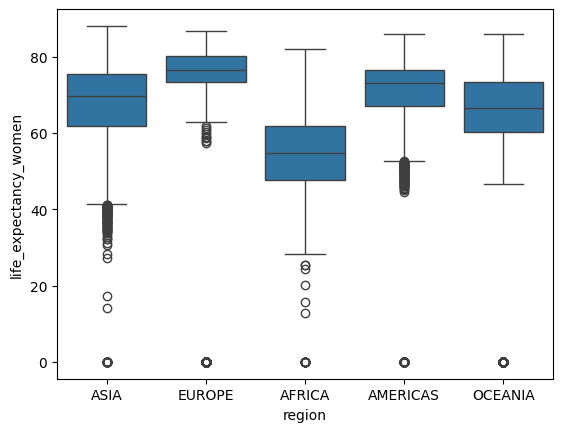

In [22]:
sns.scatterplot(x='life_expectancy_women', y='life_expectancy_men', data=df)
plt.show()
sns.boxplot(x='region', y='life_expectancy_women', data=df)
plt.show()
# Explore other combinations

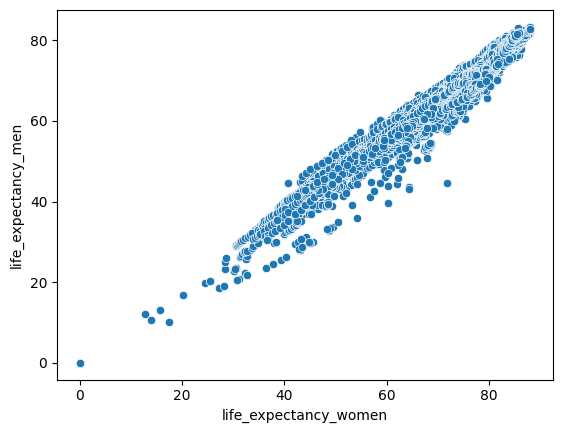

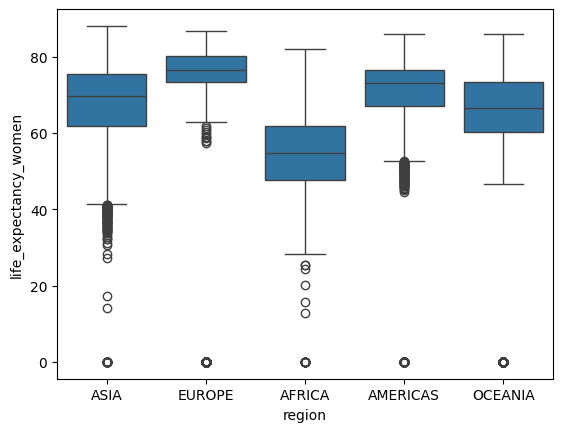

In [23]:
sns.scatterplot(x='life_expectancy_women', y='life_expectancy_men', data=df)
plt.show()
sns.boxplot(x='region', y='life_expectancy_women', data=df)
plt.show()
# Explore other combinations

In [25]:
region_life_expectancy = df.groupby('region')['life_expectancy_women'].mean()
print(region_life_expectancy)

region
AFRICA      54.866581
AMERICAS    69.532050
ASIA        67.038092
EUROPE      70.627036
OCEANIA     58.386174
Name: life_expectancy_women, dtype: float64


In [26]:
region_life_expectancy = df.groupby('region')['life_expectancy_men'].mean()
print(region_life_expectancy)

region
AFRICA      51.138054
AMERICAS    64.224075
ASIA        62.187000
EUROPE      64.646960
OCEANIA     54.038722
Name: life_expectancy_men, dtype: float64


In [27]:
df = df.set_index('year') #setting year as index

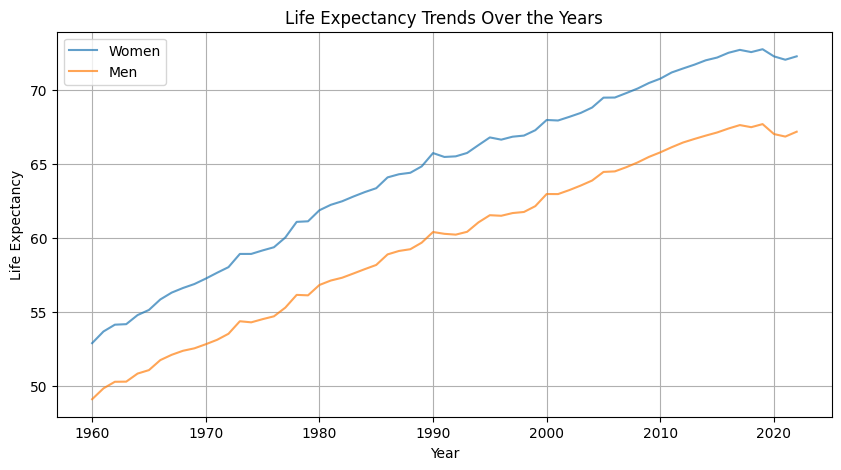

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Group by year and compute the mean life expectancy for men and women
df_mean = df.groupby(df.index)[['life_expectancy_women', 'life_expectancy_men']].mean()

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df_mean.index, df_mean['life_expectancy_women'], label='Women', alpha=0.7)
plt.plot(df_mean.index, df_mean['life_expectancy_men'], label='Men', alpha=0.7)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Trends Over the Years')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [32]:

# Calculate the mean life expectancy for women and men
mean_women = df['life_expectancy_women'].mean()
mean_men = df['life_expectancy_men'].mean()

In [35]:
# Calculate the mean life expectancy for women and men
mean_women = df['life_expectancy_women'].mean()
mean_men = df['life_expectancy_men'].mean()